# Molecular Dynamics Simulation View

## Configurations

In [2]:
from sys import stdout

import random
import mdtraj
import nglview
import pandas
import numpy as np
import matplotlib.pyplot as plt

from openmm import *
from tqdm.auto import tqdm
from matplotlib import animation 
from openmm.app import *
from openmm.unit import *
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data_dir = "../data"
IMAGE_SIZE = "400px"

## All states

In [4]:
molecule = "alanine"
state_list = ["alpha_L", "alpha_P", "alpha_R", "c5", "c7", "pII"]
colors = []
for _ in range(len(state_list)):
    colors.append("#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]))

In [5]:
psi_list = []
phi_list = []

for state in state_list:
    state_file = f"{data_dir}/{molecule}/{state}.pdb"
    state_traj = mdtraj.load(state_file)
    psi = mdtraj.compute_psi(state_traj)[1].ravel()[0]
    phi = mdtraj.compute_phi(state_traj)[1].ravel()[0]
    psi_list.append(psi * 180 / np.pi)
    phi_list.append(phi * 180 / np.pi)

for idx, state in enumerate(state_list):
    print(f"State {state}: psi {psi_list[idx]}, phi {phi_list[idx]}")

State alpha_L: psi 65.03275142749514, phi 40.01006995030287
State alpha_P: psi -64.96490032828024, phi -149.9864462486278
State alpha_R: psi -49.996858365993695, phi -70.00671374715186
State c5: psi 173.77789392037147, phi -146.7801095654137
State c7: psi -100.02971865910253, phi 50.00953861218782
State pII: psi 135.00525958728358, phi -70.00671374715186


<Figure size 640x480 with 0 Axes>

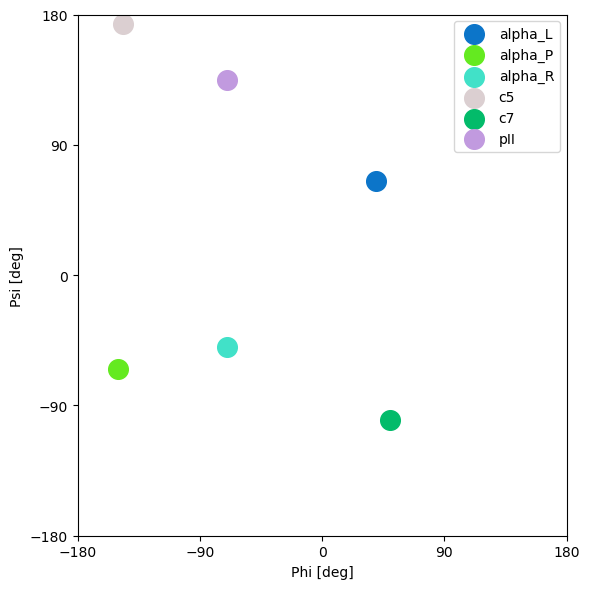

In [6]:
def ram(state_list, phi_list, psi_list):
    fig = plt.figure()
    fig, ax1 = plt.subplots(figsize=(6,6))
    num_points = len(state_list)

    for idx in range(num_points):
        ax1.scatter(phi_list[idx], psi_list[idx], s=200, color=colors[idx], label=state_list[idx])
    
    ax1.set_xlim(-180, 180)
    ax1.set_ylim(-180, 180)
    ax1.set_xticks(np.linspace(-180, 180, 5))
    ax1.set_yticks(np.linspace(-180, 180, 5))
    ax1.set_xlabel("Phi [deg]")
    ax1.set_ylabel("Psi [deg]")

    ax1.legend()
    fig.tight_layout()

ram(state_list, phi_list, psi_list)

In [31]:
state_file = f"{data_dir}/{molecule}/{state}.pdb"
print(f"State file: {state_file}")

traj_ad_state = mdtraj.load(state_file)
traj_ad_state.superpose(traj_ad_state, 0)
nglview.show_mdtraj(traj_ad_state, width=IMAGE_SIZE, height=IMAGE_SIZE)

State file: ../data/alanine/pII.pdb


NGLWidget()

## All states 2

In [19]:
molecule = "alanine"
state_list = ["C7eq", "C5", "C7ax", "Beta 2", "Alpha R", "Alpha L", "Beta", "Alpha '", "Alpha D"]
psi_list = [73, 165, -58, 25, -23, 30, 134, -48, -155]
phi_list = [-83, -162, 74, -123, -75, 67, -58, -170, 62]
colors = ["#C40C0C", "#FF6500", "#FF8A08", "#FF0080", "#46244C", "#AD49E1", "#7A1CAC", "#433D8B", "#15F5BA"  ]

<Figure size 640x480 with 0 Axes>

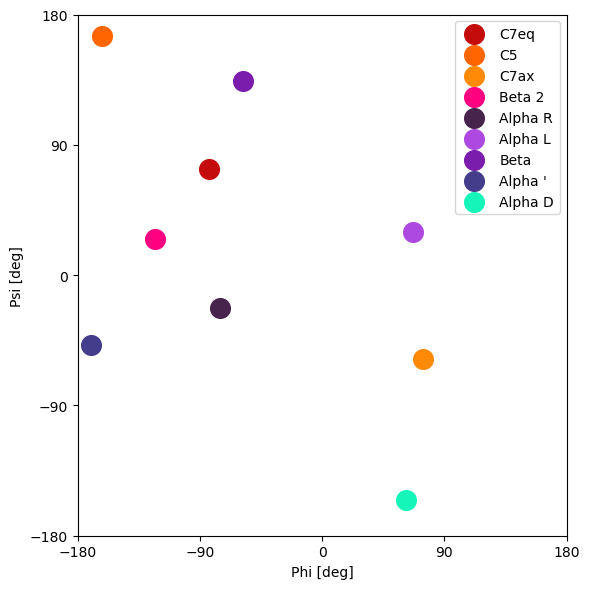

In [18]:
def ram(state_list, phi_list, psi_list):
    fig = plt.figure()
    fig, ax1 = plt.subplots(figsize=(6,6))
    num_points = len(state_list)

    for idx in range(num_points):
        ax1.scatter(phi_list[idx], psi_list[idx], s=200, color=colors[idx], label=state_list[idx])
    
    ax1.set_xlim(-180, 180)
    ax1.set_ylim(-180, 180)
    ax1.set_xticks(np.linspace(-180, 180, 5))
    ax1.set_yticks(np.linspace(-180, 180, 5))
    ax1.set_xlabel("Phi [deg]")
    ax1.set_ylabel("Psi [deg]")

    ax1.legend()
    fig.tight_layout()

ram(state_list, phi_list, psi_list)